# Machine Learning for Medicine TP 2
## Clustering

In [152]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
import os
import pandas as pd
import numpy as np

data_dir = 'data'

### Data

**Data** (simulated data sets + data sets of TME 1)
We explore two data sets downloadable from the Machine Learning Repository (http://archive.
ics.uci.edu/ml/index.php)
 - Breast Cancer Wisconsin (Diagnostic) Data Set (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
 - Mice Protein Expression Data Set (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)

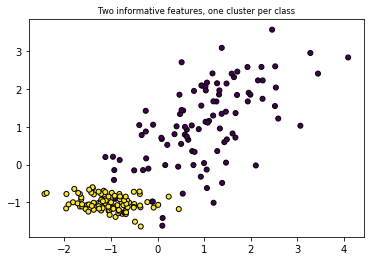

In [153]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

In [154]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

In [155]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [209]:
## Breast Cancer Wisconsin (Diagnostic) Data Set
wdbc_ds = pd.read_csv(os.path.join(data_dir, 'wdbc.data'))
#'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
features = ['feature{}'.format(i) for i in range(30)]
columns = ['ID_number', 'Diagnosis']+features 
wdbc_ds.columns = columns
wdbc_ds.Diagnosis = wdbc_ds.Diagnosis.astype('category')
wdbc_ds = wdbc_ds.set_index('ID_number')
Y4 = wdbc_ds.Diagnosis
X4 = wdbc_ds[features]

X4_pca = PCA(n_components=2).fit_transform(X4)
plt.scatter(X4_pca[:, 0], X4_pca[:, 1], s=10, c=Y4)
plt.show()

# print(wdbc_ds.Diagnosis)
wdbc_ds

Diagnosis  feature0  feature1  feature2  feature3  feature4  \
ID_number                                                               
842517            M     20.57     17.77    132.90    1326.0   0.08474   
84300903          M     19.69     21.25    130.00    1203.0   0.10960   
84348301          M     11.42     20.38     77.58     386.1   0.14250   
84358402          M     20.29     14.34    135.10    1297.0   0.10030   
843786            M     12.45     15.70     82.57     477.1   0.12780   
...             ...       ...       ...       ...       ...       ...   
926424            M     21.56     22.39    142.00    1479.0   0.11100   
926682            M     20.13     28.25    131.20    1261.0   0.09780   
926954            M     16.60     28.08    108.30     858.1   0.08455   
927241            M     20.60     29.33    140.10    1265.0   0.11780   
92751             B      7.76     24.54     47.92     181.0   0.05263   

           feature5  feature6  feature7  feature8  ...  feature20  feature21  \
ID_number                                          ...                         
842517      0.07864   0.08690   0.07017    0.1812  ...     24.990      23.41   
84300903    0.15990   0.19740   0.12790    0.2069  ...     23.570      25.53   
84348301    0.28390   0.24140   0.10520    0.2597  ...     14.910      26.50   
84358402    0.13280   0.19800   0.10430    0.1809  ...     22.540      16.67   
843786      0.17000   0.15780   0.08089    0.2087  ...     15.470      23.75   
...             ...       ...       ...       ...  ...        ...        ...   
926424      0.11590   0.24390   0.13890    0.1726  ...     25.450      26.40   
926682      0.10340   0.14400   0.09791    0.1752  ...     23.690      38.25   
926954      0.10230   0.09251   0.05302    0.1590  ...     18.980      34.12   
927241      0.27700   0.35140   0.15200    0.2397  ...     25.740      39.42   
92751       0.04362   0.00000   0.00000    0.1587  ...      9.456      30.37   

           feature22  feature23  feature24  feature25  feature26  feature27  \
ID_number                                                                     
842517        158.80     1956.0    0.12380    0.18660     0.2416     0.1860   
84300903      152.50     1709.0    0.14440    0.42450     0.4504     0.2430   
84348301       98.87      567.7    0.20980    0.86630     0.6869     0.2575   
84358402      152.20     1575.0    0.13740    0.20500     0.4000     0.1625   
843786        103.40      741.6    0.17910    0.52490     0.5355     0.1741   
...              ...        ...        ...        ...        ...        ...   
926424        166.10     2027.0    0.14100    0.21130     0.4107     0.2216   
926682        155.00     1731.0    0.11660    0.19220     0.3215     0.1628   
926954        126.70     1124.0    0.11390    0.30940     0.3403     0.1418   
927241        184.60     1821.0    0.16500    0.86810     0.9387     0.2650   
92751          59.16      268.6    0.08996    0.06444     0.0000     0.0000   

           feature28  feature29  
ID_number                        
842517        0.2750    0.08902  
84300903      0.3613    0.08758  
84348301      0.6638    0.17300  
84358402      0.2364    0.07678  
843786        0.3985    0.12440  
...              ...        ...  
926424        0.2060    0.07115  
926682        0.2572    0.06637  
926954        0.2218    0.07820  
927241        0.4087    0.12400  
92751         0.2871    0.07039  

[568 rows x 31 columns]

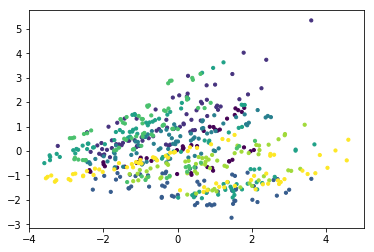

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
MouseID                                                                         
3415_1   0.649781  0.828696  0.405862  2.921435  5.167979  0.207174  0.176640   
3415_2   0.616481  0.841974  0.388584  2.862575  5.194163  0.223433  0.167725   
3415_3   0.637424  0.852882  0.400561  2.968155  5.350820  0.208790  0.173261   
3415_4   0.576815  0.755390  0.348346  2.624901  4.727509  0.205892  0.161192   
3415_5   0.542545  0.757917  0.350051  2.634509  4.735602  0.210526  0.165671   
...           ...       ...       ...       ...       ...       ...       ...   
3525_11  0.382149  0.595792  0.399101  2.527574  4.629493  0.317810  0.213235   
3525_12  0.387947  0.586510  0.431650  2.527041  4.781082  0.316903  0.222111   
3525_13  0.343695  0.562547  0.361243  2.412885  3.949361  0.330158  0.225620   
3525_14  0.346594  0.551467  0.390353  2.445052  4.236201  0.343610  0.229239   
3525_15  0.365907  0.552861  0.386275  2.473812  4.347236  0.353783  0.232784   

         pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
MouseID                                 ...                                  
3415_1    3.728084  0.239283  1.666579  ...  0.129363  0.486912   0.125152   
3415_2    3.648240  0.221030  1.565150  ...  0.143084  0.467833   0.112857   
3415_3    3.814545  0.222300  1.741732  ...  0.147673  0.462501   0.116433   
3415_4    3.778530  0.194153  1.505475  ...  0.121290  0.479110   0.102831   
3415_5    3.871971  0.194297  1.531613  ...  0.142617  0.438354   0.110614   
...            ...       ...       ...  ...       ...       ...        ...   
3525_11   6.219567  0.232639  1.495507  ...  0.122308  0.507017   0.172393   
3525_12   6.307723  0.239074  1.594492  ...  0.121216  0.492432   0.177319   
3525_13   6.060165  0.254951  1.625219  ...  0.121936  0.490258   0.169076   
3525_14   6.023371  0.240676  1.674043  ...  0.136900  0.502282   0.180016   
3525_15   6.085354  0.242726  1.677740  ...  0.130069  0.487991   0.194635   

           EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
MouseID                                                                      
3415_1   0.146865  0.143517  1.627181   Control  Memantine       C/S      0  
3415_2   0.161132  0.145719  1.562096   Control  Memantine       C/S      0  
3415_3   0.160594  0.142879  1.571868   Control  Memantine       C/S      0  
3415_4   0.144238  0.141681  1.646608   Control  Memantine       C/S      0  
3415_5   0.155667  0.146408  1.607631   Control  Memantine       C/S      0  
...           ...       ...       ...       ...        ...       ...    ...  
3525_11  0.200097  0.221994  1.141423    Ts65Dn     Saline       S/C      7  
3525_12  0.207593  0.235223  1.104757    Ts65Dn     Saline       S/C      7  
3525_13  0.182590  0.243715  1.104494    Ts65Dn     Saline       S/C      7  
3525_14  0.199685  0.269866  1.136585    Ts65Dn     Saline       S/C      7  
3525_15  0.220056  0.242514  1.085621    Ts65Dn     Saline       S/C      7  

[552 rows x 81 columns]

In [210]:
### Mice Protein Expression Data Set 
mice_ds = pd.read_excel(os.path.join(data_dir, "Data_Cortex_Nuclear.xls"))
mice_ds = mice_ds.set_index("MouseID")
# mice_ds.Genotype  = mice_ds.Genotype .astype('category').cat.codes
# mice_ds.Treatment = mice_ds.Treatment.astype('category').cat.codes
# mice_ds.Behavior  = mice_ds.Behavior .astype('category').cat.codes
mice_ds['class']  = mice_ds['class'] .astype('category').cat.codes

# remove all nan :
mice_ds = mice_ds[~mice_ds.isna().any(axis=1)]

Y5 = mice_ds['class'].astype('float')
X5 = mice_ds[mice_ds.columns[:-4]]#.astype('float')

X5_pca = PCA(n_components=2).fit_transform(X5)
plt.scatter(X5_pca[:, 0], X5_pca[:, 1], s=10, c=Y5)
plt.show()

# print(Y5)
mice_ds

In [211]:
datasets = [
    ('sim1', (X1, Y1, 2)),
    ('sim2', (X2, Y2, 3)),
    ('sim3', (X3, Y3, 2)),
    ('wdbc', (X4, Y4, 2)),
    ('mice', (X5, Y5, 8)),
]

### Analysis

In [212]:
from sklearn.decomposition import PCA

metrics_list = [
    ('homogeneity_score',   lambda Y_true, Y_pred, X: homogeneity_score(Y_true, Y_pred)),
    ('completeness_score',  lambda Y_true, Y_pred, X: completeness_score(Y_true, Y_pred)),
    ('v_measure_score',     lambda Y_true, Y_pred, X: v_measure_score(Y_true, Y_pred)),
    ('adjusted_rand_score', lambda Y_true, Y_pred, X: adjusted_rand_score(Y_true, Y_pred)),
    ('silhouette_score',    lambda Y_true, Y_pred, X: silhouette_score(X, Y_pred)),
]

classif_list = [
    'kmeans',
    'hierarchical_ward',
    'hierarchical_average',
    'hierarchical_complete',
    'spectral',
]

scores = np.zeros((len(datasets), len(classif_list), len(metrics_list)))

def plot_clustering(X, Y_true, Y_pred, data_name, classif_name):
    if X.shape[1] != 2:
        X = PCA(n_components=2).fit_transform(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=Y)
    plt.title(data_name)
#     plt.legend()
    plt.show()
    i = [i for i,(n,_) in enumerate(datasets) if n==data_name][0]
    j = classif_list.index(classif_name)
    for k, (m_name, m) in enumerate(metrics_list):
        s = m(Y_true,Y_pred, X)
        print(m_name+" = ", s)
        scores[i,j,k] = s
        

homogeneity_score =  0.637635276587782
completeness_score =  0.6512316288528017
v_measure_score =  0.6443617382577146
adjusted_rand_score =  0.6707927107554288
silhouette_score =  0.6400671383378083


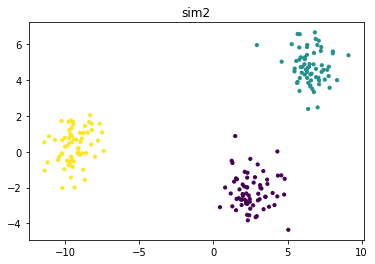

homogeneity_score =  1.0000000000000002
completeness_score =  1.0
v_measure_score =  1.0000000000000002
adjusted_rand_score =  1.0
silhouette_score =  0.814623202721078


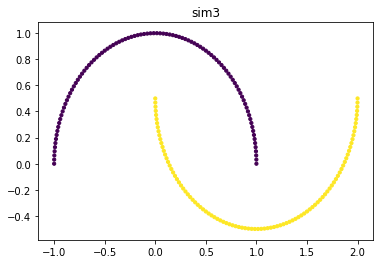

homogeneity_score =  0.18872187554086517
completeness_score =  0.18872187554086517
v_measure_score =  0.18872187554086517
adjusted_rand_score =  0.24621212121212127
silhouette_score =  0.48941214163707103


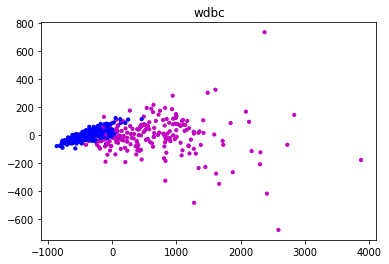

homogeneity_score =  0.4207868790504153
completeness_score =  0.5160872013904579
v_measure_score =  0.4635899899990012
adjusted_rand_score =  0.4904125824520365
silhouette_score =  0.6984177173911995


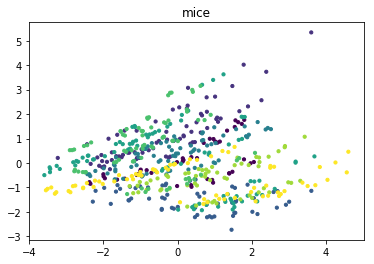

homogeneity_score =  0.2965556015317273
completeness_score =  0.30318545311588974
v_measure_score =  0.2998338823987301
adjusted_rand_score =  0.1497029501366676
silhouette_score =  0.17544375462979783


In [213]:
# K-means
classif_name = 'kmeans'

for name, (X,Y, k) in datasets:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    km.fit(X)
    plot_clustering(X, Y, km.labels_, name, classif_name)

Linkage : ward


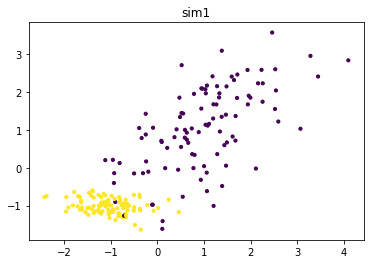

homogeneity_score =  0.6129717804506558
completeness_score =  0.6193768110468668
v_measure_score =  0.6161576509385098
adjusted_rand_score =  0.6873512291127871
silhouette_score =  0.6248346236741049


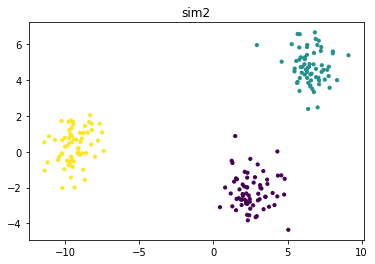

homogeneity_score =  1.0000000000000002
completeness_score =  1.0
v_measure_score =  1.0000000000000002
adjusted_rand_score =  1.0
silhouette_score =  0.814623202721078


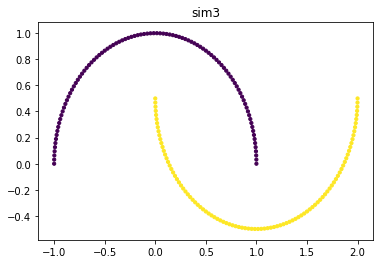

homogeneity_score =  0.49342260576014585
completeness_score =  0.5282512370705066
v_measure_score =  0.5102432713148244
adjusted_rand_score =  0.48765712554899293
silhouette_score =  0.4418858667981908


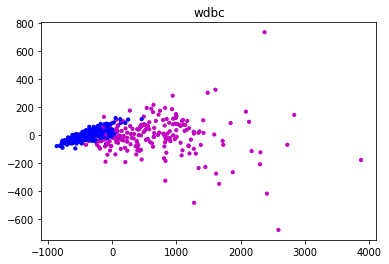

homogeneity_score =  0.26020349940756604
completeness_score =  0.4066975583772791
v_measure_score =  0.3173608038403255
adjusted_rand_score =  0.28574277597121495
silhouette_score =  0.6910417480386571


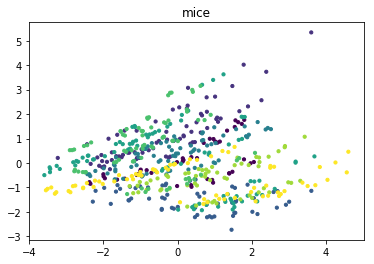

homogeneity_score =  0.3977292019988016
completeness_score =  0.40090912212045293
v_measure_score =  0.3993128313516743
adjusted_rand_score =  0.21048836800109683
silhouette_score =  0.06949273072870317
Linkage : average


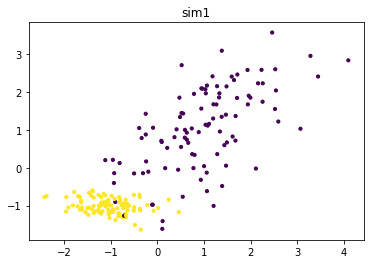

homogeneity_score =  0.637635276587782
completeness_score =  0.6512316288528017
v_measure_score =  0.6443617382577146
adjusted_rand_score =  0.6707927107554288
silhouette_score =  0.6387292283949862


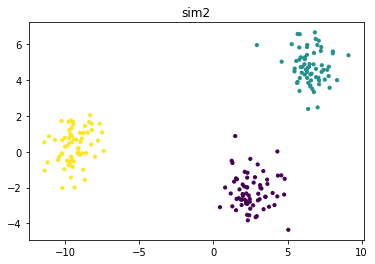

homogeneity_score =  1.0000000000000002
completeness_score =  1.0
v_measure_score =  1.0000000000000002
adjusted_rand_score =  1.0
silhouette_score =  0.814623202721078


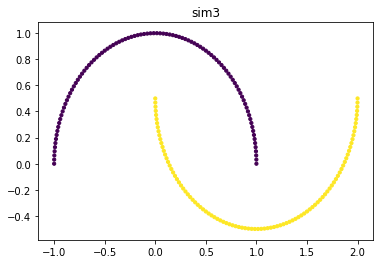

homogeneity_score =  0.3273236044950171
completeness_score =  0.3959177994433104
v_measure_score =  0.3583678713409786
adjusted_rand_score =  0.2675674366797423
silhouette_score =  0.43197692345545863


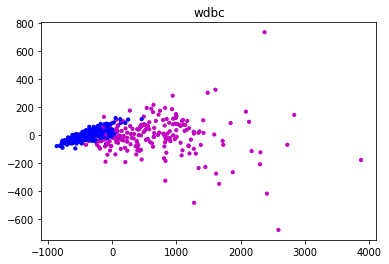

homogeneity_score =  0.06299376454288184
completeness_score =  0.24517705692069808
v_measure_score =  0.10023418649195158
adjusted_rand_score =  0.061661224554942676
silhouette_score =  0.6841366916643472


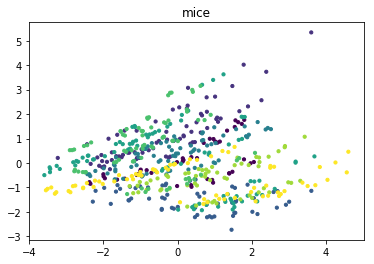

homogeneity_score =  0.11568830762297397
completeness_score =  0.18057574683891653
v_measure_score =  0.14102623814753784
adjusted_rand_score =  0.044195821697281854
silhouette_score =  0.06887947126299851
Linkage : complete


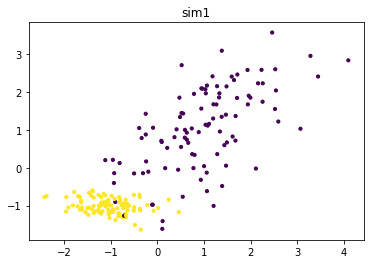

homogeneity_score =  0.6129717804506558
completeness_score =  0.6193768110468668
v_measure_score =  0.6161576509385098
adjusted_rand_score =  0.6873512291127871
silhouette_score =  0.6248346236741049


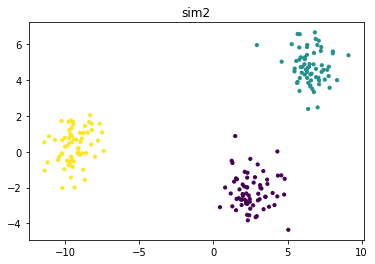

homogeneity_score =  1.0000000000000002
completeness_score =  1.0
v_measure_score =  1.0000000000000002
adjusted_rand_score =  1.0
silhouette_score =  0.814623202721078


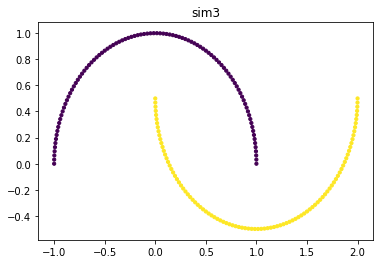

homogeneity_score =  0.5605218825340389
completeness_score =  0.5850702469516912
v_measure_score =  0.5725330469636436
adjusted_rand_score =  0.5755901313557268
silhouette_score =  0.43203293597335896


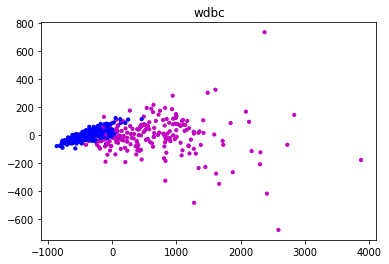

homogeneity_score =  0.05451445138637955
completeness_score =  0.2359699887758165
v_measure_score =  0.08856773515704393
adjusted_rand_score =  0.05295171907124782
silhouette_score =  0.6930617715673533


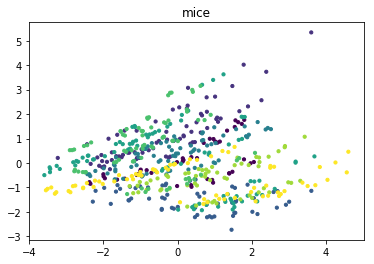

homogeneity_score =  0.1979829507651838
completeness_score =  0.23128770341463117
v_measure_score =  0.21334336066005663
adjusted_rand_score =  0.0865410100030045
silhouette_score =  0.12257127856776781


In [214]:
#### Hierarchical clustering
classif_name = 'hierarchical'

for linkage in ('ward', 'average', 'complete'):
    print('Linkage :', linkage)
    for name, (X,Y, k) in datasets:
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
        clustering.fit(X)
        plot_clustering(X, Y, clustering.labels_, name, classif_name+'_'+linkage)    
        

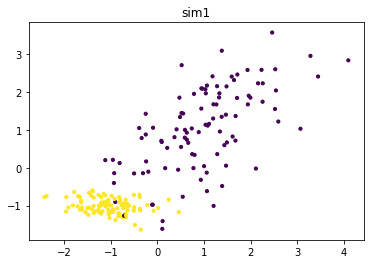

homogeneity_score =  0.6653506073930867
completeness_score =  0.6763210567307193
v_measure_score =  0.6707909810145537
adjusted_rand_score =  0.7041462280861005
silhouette_score =  0.6383286452412402


/home/pierre/.conda/envs/py3k/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


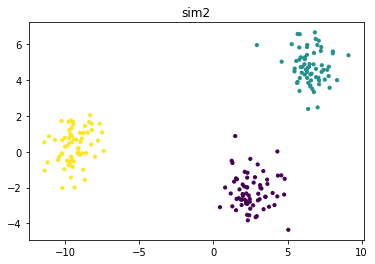

homogeneity_score =  1.0000000000000002
completeness_score =  1.0
v_measure_score =  1.0000000000000002
adjusted_rand_score =  1.0
silhouette_score =  0.814623202721078


/home/pierre/.conda/envs/py3k/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


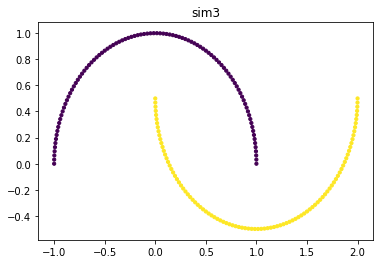

homogeneity_score =  1.0
completeness_score =  1.0
v_measure_score =  1.0
adjusted_rand_score =  1.0
silhouette_score =  0.32831603288410605


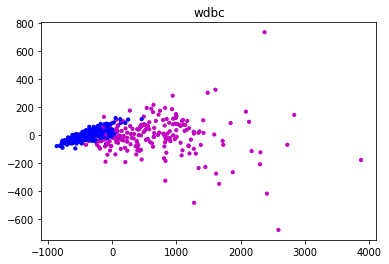

homogeneity_score =  0.4265325322377726
completeness_score =  0.4067929913680737
v_measure_score =  0.4164289699276542
adjusted_rand_score =  0.4186960240003751
silhouette_score =  0.4080520247934197


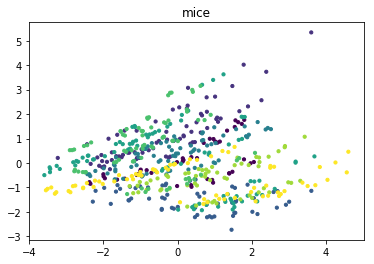

homogeneity_score =  0.48165477851605126
completeness_score =  0.5043903146128326
v_measure_score =  0.49276043654269447
adjusted_rand_score =  0.2677697045595958
silhouette_score =  -0.03954190773319481


In [215]:
# Spectral clustering
classif_name = 'spectral'

for name, (X,Y, k) in datasets:
    spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors")
    spectral.fit(X)
    plot_clustering(X, Y, spectral.labels_, name, classif_name)  
    

Et ici on peut finalement obtenir une calassification par métrique et par dataset de l'ensemble des classifieurs :

In [216]:
## Final score :

idx_scores = np.argsort(-scores, axis=1)

for i,(ds_name,_) in enumerate(datasets):
    print('\n\n\n ############## Dataset {} ##############'.format(ds_name))
    for k,(m_name,_) in enumerate(metrics_list):
        print('\nMetric {}'.format(m_name))
        for rank, j in enumerate(idx_scores[i,:,k]):
            print('  {0: <1}. {1: <23}{2: <5}'.format(rank+1, classif_list[j], scores[i,j,k]))




 ############## Dataset sim1 ##############

Metric homogeneity_score
  1. spectral               0.6653506073930867
  2. kmeans                 0.637635276587782
  3. hierarchical_average   0.637635276587782
  4. hierarchical_ward      0.6129717804506558
  5. hierarchical_complete  0.6129717804506558

Metric completeness_score
  1. spectral               0.6763210567307193
  2. kmeans                 0.6512316288528017
  3. hierarchical_average   0.6512316288528017
  4. hierarchical_ward      0.6193768110468668
  5. hierarchical_complete  0.6193768110468668

Metric v_measure_score
  1. spectral               0.6707909810145537
  2. kmeans                 0.6443617382577146
  3. hierarchical_average   0.6443617382577146
  4. hierarchical_ward      0.6161576509385098
  5. hierarchical_complete  0.6161576509385098

Metric adjusted_rand_score
  1. spectral               0.7041462280861005
  2. hierarchical_ward      0.6873512291127871
  3. hierarchical_complete  0.6873512291127871
  4.